In [1]:
from datasets import load_dataset

c:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_train = load_dataset("GonzaloA/fake_news", split="train")
dataset_test = load_dataset("GonzaloA/fake_news", split="test")
dataset_validation = load_dataset("GonzaloA/fake_news", split="validation")

Found cached dataset parquet (C:/Users/natal/.cache/huggingface/datasets/GonzaloA___parquet/GonzaloA--fake_news-1fe2b42e1fa111c8/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Found cached dataset parquet (C:/Users/natal/.cache/huggingface/datasets/GonzaloA___parquet/GonzaloA--fake_news-1fe2b42e1fa111c8/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Found cached dataset parquet (C:/Users/natal/.cache/huggingface/datasets/GonzaloA___parquet/GonzaloA--fake_news-1fe2b42e1fa111c8/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


In [3]:
import pandas as pd 

In [58]:
#converting datasets into dataframes
df_train = pd.DataFrame(dataset_train)
df_test = pd.DataFrame(dataset_test)
df_validate = pd.DataFrame(dataset_validation)

In [5]:
df_negated = pd.read_csv('negated_data_using_negated_library_val.csv')

In [6]:
df_train_negated = pd.read_csv('negated_data_using_negated_library.csv')

In [59]:
#dropping unnamed column
df_train.drop('Unnamed: 0', inplace=True, axis=1)
df_test.drop('Unnamed: 0', inplace=True, axis=1)
df_validate.drop('Unnamed: 0', inplace=True, axis=1)

In [8]:
df_negated.drop('Unnamed: 0', inplace=True, axis=1)

In [9]:
df_train_negated.drop('Unnamed: 0', inplace=True, axis=1)

In [60]:
df = df_train.rename(columns={'title':'statement'})
df = df.dropna(subset=['statement']).reset_index(drop=True)
df = df.drop(['text'], axis=1)

In [61]:
df1 = df_test.rename(columns={'title':'statement'})
df1 = df1.dropna(subset=['statement']).reset_index(drop=True)
df1 = df1.drop(['text'], axis=1)

In [62]:
df2 = df_validate.rename(columns={'title':'statement'})
df2 = df2.dropna(subset=['statement']).reset_index(drop=True)
df2 = df2.drop(['text'], axis=1)

In [63]:
df['statement'] = df['statement'].apply(lambda x: x.lower().replace('’',"'"))
df1['statement'] = df1['statement'].apply(lambda x: x.lower().replace('’',"'"))
df2['statement'] = df2['statement'].apply(lambda x: x.lower().replace('’',"'"))

In [14]:
df_negated = df_negated.dropna(subset=['statement']).reset_index(drop=True)
df_negated['statement'] = df_negated['statement'].apply(lambda x: x.lower().replace('’',"'"))

In [15]:
df_train_negated = df_train_negated.dropna(subset=['statement']).reset_index(drop=True)
df_train_negated['statement'] = df_train_negated['statement'].apply(lambda x: x.lower().replace('’',"'"))

In [64]:
#removing punctuation
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str


In [65]:
df['statement'] = df['statement'].apply(punctuation_removal)
df1['statement'] = df1['statement'].apply(punctuation_removal)
df2['statement'] = df2['statement'].apply(punctuation_removal)

In [18]:
df_negated['statement'] = df_negated['statement'].apply(punctuation_removal)

In [19]:
df_train_negated['statement'] = df_train_negated['statement'].apply(punctuation_removal)

In [66]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
#removing stop words
df['statement'] = df['statement'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
df1['statement'] = df1['statement'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
df2['statement'] = df2['statement'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))

In [22]:
from keras.preprocessing.text import Tokenizer

In [23]:
from keras.utils import pad_sequences

In [69]:
# tokenize text df train
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['statement'])
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

24208

In [25]:
#df negated validation data
tokenizer3 = Tokenizer()
tokenizer3.fit_on_texts(df_negated['statement'])
word_index3 = tokenizer3.word_index
vocab_size3 = len(word_index3)
vocab_size3

13619

In [70]:
# df test
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(df1['statement'])
word_index1 = tokenizer1.word_index
vocab_size1 = len(word_index1)
vocab_size1

13664

In [71]:
# df validation
tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(df2['statement'])
word_index2 = tokenizer2.word_index
vocab_size2 = len(word_index2)
vocab_size2

13661

In [28]:
# df train negated
tokenizer4 = Tokenizer()
tokenizer4.fit_on_texts(df_train_negated['statement'])
word_index4 = tokenizer4.word_index
vocab_size4 = len(word_index4)
vocab_size4

24127

In [72]:
# padding data
sequences = tokenizer.texts_to_sequences(df['statement'])
padded_seq = pad_sequences(sequences, maxlen=500, padding='post', truncating='post')

# padding data
sequences1 = tokenizer1.texts_to_sequences(df1['statement'])
padded_seq1 = pad_sequences(sequences1, maxlen=500, padding='post', truncating='post')

# padding data
sequences2 = tokenizer2.texts_to_sequences(df2['statement'])
padded_seq2 = pad_sequences(sequences2, maxlen=500, padding='post', truncating='post')

# padding data
#sequences3 = tokenizer3.texts_to_sequences(df_negated['statement'])
#padded_seq3 = pad_sequences(sequences3, maxlen=500, padding='post', truncating='post')

In [30]:
# padding data
sequences4 = tokenizer4.texts_to_sequences(df_train_negated['statement'])
padded_seq4 = pad_sequences(sequences4, maxlen=500, padding='post', truncating='post')

In [31]:
import numpy as np

In [73]:
# create embedding index
embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
         values = line.split()
         word = values[0]
         coefs = np.asarray(values[1:], dtype='float32')
         embedding_index[word] = coefs

In [74]:
# create embedding matrix
embedding_matrix = np.zeros((vocab_size+1, 100))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
         embedding_matrix[i] = embedding_vector

In [75]:
#baseline
x_train = padded_seq
y_train = df['label']
x_test = padded_seq2
y_test = df2['label']

In [35]:
#adversarial training
x_train1 = padded_seq4
y_train1 = df_train_negated['label']
x_test1 = padded_seq2
y_test1 = df2['label']

In [36]:
#adversarial attack
x_train2 = padded_seq
y_train2 = df['label']
x_test2 = padded_seq3
y_test2 = df_negated['label']

In [37]:
#adversarial training and attack attack
x_train3 = padded_seq4
y_train3 = df_train_negated['label']
x_test3 = padded_seq3
y_test3 = df_negated['label']

In [38]:
import tensorflow as tf

In [39]:
#Sequential model 
model = tf.keras.Sequential()

#Dense layer - 128 units -input shape is for the 100 vector length, relu activation
model.add(tf.keras.layers.Dense(24366,input_shape=[500],activation='relu'))
#'Turn off' half the neurons (reduce overfitting - model will not memorize data and will understand patterns)
model.add(tf.keras.layers.Dropout(0.5))
#Dense layer - 64 units, relu activation
model.add(tf.keras.layers.Dense(64,activation='relu'))
#Dense layer - 32 units, relu activation
model.add(tf.keras.layers.Dense(32,activation='relu'))
#Dense layer - 16 units, relu activation
model.add(tf.keras.layers.Dense(16,activation='relu'))
#Dense layer - 1 units, sigmoid activation
#Binary problem - probability of 1 class - derived with sigmoid
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

#Train on Adam optimizer with 1e-4 learning rate, loss of binary crossentropy, accuracy tracked
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4),loss="binary_crossentropy", metrics=['accuracy'])

#Train on training set, test on testing set, for 5 epochs
history = model.fit(x_train,y_train,validation_data=[x_test,y_test], epochs= 10)

Epoch 1/10
762/762 [==============================] - 196s 254ms/step - loss: 1.2701 - accuracy: 0.6286 - val_loss: 0.6638 - val_accuracy: 0.6817
Epoch 2/10
762/762 [==============================] - 176s 232ms/step - loss: 0.6053 - accuracy: 0.7103 - val_loss: 0.5695 - val_accuracy: 0.7362
Epoch 3/10
762/762 [==============================] - 174s 229ms/step - loss: 0.5683 - accuracy: 0.7364 - val_loss: 0.5505 - val_accuracy: 0.7535
Epoch 4/10
762/762 [==============================] - 174s 228ms/step - loss: 0.5621 - accuracy: 0.7433 - val_loss: 0.5393 - val_accuracy: 0.7499
Epoch 5/10
762/762 [==============================] - 174s 228ms/step - loss: 0.5532 - accuracy: 0.7462 - val_loss: 0.5460 - val_accuracy: 0.7434
Epoch 6/10
762/762 [==============================] - 178s 233ms/step - loss: 0.5511 - accuracy: 0.7462 - val_loss: 0.5346 - val_accuracy: 0.7599
Epoch 7/10
762/762 [==============================] - 180s 237ms/step - loss: 0.5409 - accuracy: 0.7513 - val_loss: 0.5179 -

In [78]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24366)             12207366  
                                                                 
 dropout (Dropout)           (None, 24366)             0         
                                                                 
 dense_1 (Dense)             (None, 64)                1559488   
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13,769,479
Trainable params: 13,769,479
No

In [40]:
#Sequential model for negation adversarial training
model1 = tf.keras.Sequential()

#Dense layer - 128 units -input shape is for the 100 vector length, relu activation
model1.add(tf.keras.layers.Dense(24128,input_shape=[500],activation='relu'))
#'Turn off' half the neurons (reduce overfitting - model will not memorize data and will understand patterns)
model1.add(tf.keras.layers.Dropout(0.5))
#Dense layer - 64 units, relu activation
model1.add(tf.keras.layers.Dense(64,activation='relu'))
#Dense layer - 32 units, relu activation
model1.add(tf.keras.layers.Dense(32,activation='relu'))
#Dense layer - 16 units, relu activation
model1.add(tf.keras.layers.Dense(16,activation='relu'))
#Dense layer - 1 units, sigmoid activation
#Binary problem - probability of 1 class - derived with sigmoid
model1.add(tf.keras.layers.Dense(1,activation='sigmoid'))

#Train on Adam optimizer with 1e-4 learning rate, loss of binary crossentropy, accuracy tracked
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4),loss="binary_crossentropy", metrics=['accuracy'])

#Train on training set, test on testing set, for 5 epochs
history1 = model1.fit(x_train1,y_train1,validation_data=[x_test1,y_test1], epochs= 10)

Epoch 1/10
762/762 [==============================] - 178s 232ms/step - loss: 1.9884 - accuracy: 0.6210 - val_loss: 0.6781 - val_accuracy: 0.7127
Epoch 2/10
762/762 [==============================] - 176s 231ms/step - loss: 0.7541 - accuracy: 0.6635 - val_loss: 0.5826 - val_accuracy: 0.7248
Epoch 3/10
762/762 [==============================] - 176s 231ms/step - loss: 0.6096 - accuracy: 0.7037 - val_loss: 0.5755 - val_accuracy: 0.7325
Epoch 4/10
762/762 [==============================] - 180s 237ms/step - loss: 0.5896 - accuracy: 0.7237 - val_loss: 0.5832 - val_accuracy: 0.6956
Epoch 5/10
762/762 [==============================] - 181s 238ms/step - loss: 0.5781 - accuracy: 0.7287 - val_loss: 0.5992 - val_accuracy: 0.7035
Epoch 6/10
762/762 [==============================] - 180s 236ms/step - loss: 0.6322 - accuracy: 0.7295 - val_loss: 0.6453 - val_accuracy: 0.6775
Epoch 7/10
762/762 [==============================] - 182s 239ms/step - loss: 0.5714 - accuracy: 0.7364 - val_loss: 0.5407 -

In [41]:
#Sequential model negation adversarial attack
model3 = tf.keras.Sequential()

#Dense layer - 128 units -input shape is for the 100 vector length, relu activation
model3.add(tf.keras.layers.Dense(24366,input_shape=[500],activation='relu'))
#'Turn off' half the neurons (reduce overfitting - model will not memorize data and will understand patterns)
model3.add(tf.keras.layers.Dropout(0.5))
#Dense layer - 64 units, relu activation
model3.add(tf.keras.layers.Dense(64,activation='relu'))
#Dense layer - 32 units, relu activation
model3.add(tf.keras.layers.Dense(32,activation='relu'))
#Dense layer - 16 units, relu activation
model3.add(tf.keras.layers.Dense(16,activation='relu'))
#Dense layer - 1 units, sigmoid activation
#Binary problem - probability of 1 class - derived with sigmoid
model3.add(tf.keras.layers.Dense(1,activation='sigmoid'))

#Train on Adam optimizer with 1e-4 learning rate, loss of binary crossentropy, accuracy tracked
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4),loss="binary_crossentropy", metrics=['accuracy'])

#Train on training set, test on testing set, for 5 epochs
history3 = model3.fit(x_train2,y_train2,validation_data=[x_test2,y_test2], epochs= 10)

Epoch 1/10
762/762 [==============================] - 175s 228ms/step - loss: 2.2847 - accuracy: 0.6321 - val_loss: 0.6200 - val_accuracy: 0.6834
Epoch 2/10
762/762 [==============================] - 175s 229ms/step - loss: 0.7081 - accuracy: 0.6847 - val_loss: 0.8381 - val_accuracy: 0.4856
Epoch 3/10
762/762 [==============================] - 176s 232ms/step - loss: 0.6269 - accuracy: 0.7119 - val_loss: 0.8745 - val_accuracy: 0.4921
Epoch 4/10
762/762 [==============================] - 196s 257ms/step - loss: 0.6198 - accuracy: 0.7197 - val_loss: 0.6592 - val_accuracy: 0.6197
Epoch 5/10
762/762 [==============================] - 187s 245ms/step - loss: 0.5738 - accuracy: 0.7340 - val_loss: 0.6136 - val_accuracy: 0.7083
Epoch 6/10
762/762 [==============================] - 187s 245ms/step - loss: 0.6015 - accuracy: 0.7282 - val_loss: 0.6993 - val_accuracy: 0.6130
Epoch 7/10
762/762 [==============================] - 185s 243ms/step - loss: 0.6186 - accuracy: 0.7275 - val_loss: 0.5919 -

In [42]:
#Sequential model adversarial training and attack
model2 = tf.keras.Sequential()

#Dense layer - 128 units -input shape is for the 100 vector length, relu activation
model2.add(tf.keras.layers.Dense(24128,input_shape=[500],activation='relu'))
#'Turn off' half the neurons (reduce overfitting - model will not memorize data and will understand patterns)
model2.add(tf.keras.layers.Dropout(0.5))
#Dense layer - 64 units, relu activation
model2.add(tf.keras.layers.Dense(64,activation='relu'))
#Dense layer - 32 units, relu activation
model2.add(tf.keras.layers.Dense(32,activation='relu'))
#Dense layer - 16 units, relu activation
model2.add(tf.keras.layers.Dense(16,activation='relu'))
#Dense layer - 1 units, sigmoid activation
#Binary problem - probability of 1 class - derived with sigmoid
model2.add(tf.keras.layers.Dense(1,activation='sigmoid'))

#Train on Adam optimizer with 1e-4 learning rate, loss of binary crossentropy, accuracy tracked
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4),loss="binary_crossentropy", metrics=['accuracy'])

#Train on training set, test on testing set, for 5 epochs
history2 = model2.fit(x_train3,y_train3,validation_data=[x_test3,y_test3], epochs= 10)

Epoch 1/10
762/762 [==============================] - 178s 231ms/step - loss: 1.9139 - accuracy: 0.6115 - val_loss: 0.5988 - val_accuracy: 0.6926
Epoch 2/10
762/762 [==============================] - 182s 238ms/step - loss: 0.6236 - accuracy: 0.6868 - val_loss: 0.6009 - val_accuracy: 0.6733
Epoch 3/10
762/762 [==============================] - 183s 240ms/step - loss: 0.5945 - accuracy: 0.7127 - val_loss: 0.5896 - val_accuracy: 0.7173
Epoch 4/10
762/762 [==============================] - 182s 239ms/step - loss: 0.6009 - accuracy: 0.7220 - val_loss: 0.6228 - val_accuracy: 0.6881
Epoch 5/10
762/762 [==============================] - 193s 253ms/step - loss: 0.5869 - accuracy: 0.7365 - val_loss: 0.5625 - val_accuracy: 0.7479
Epoch 6/10
762/762 [==============================] - 184s 242ms/step - loss: 0.5776 - accuracy: 0.7351 - val_loss: 0.5447 - val_accuracy: 0.7482
Epoch 7/10
762/762 [==============================] - 183s 240ms/step - loss: 0.5648 - accuracy: 0.7367 - val_loss: 0.5581 -

In [52]:
import matplotlib.pyplot as plt

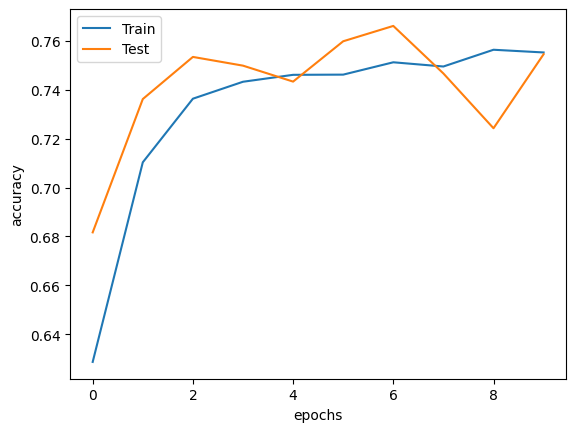

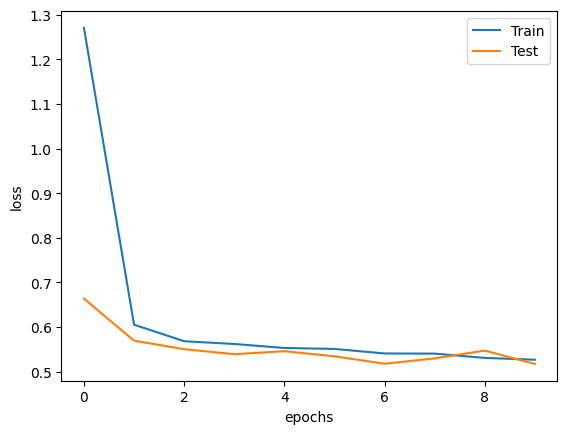

In [53]:
# baseline results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])

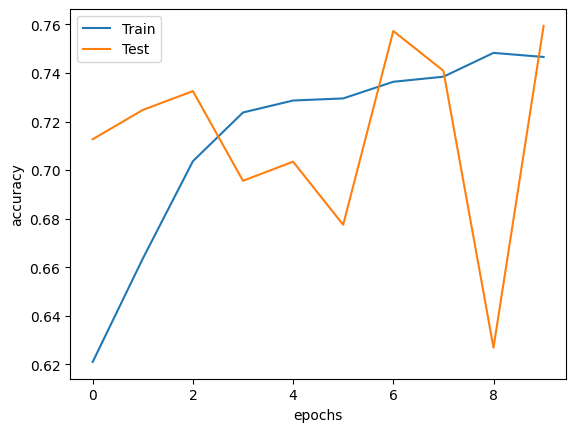

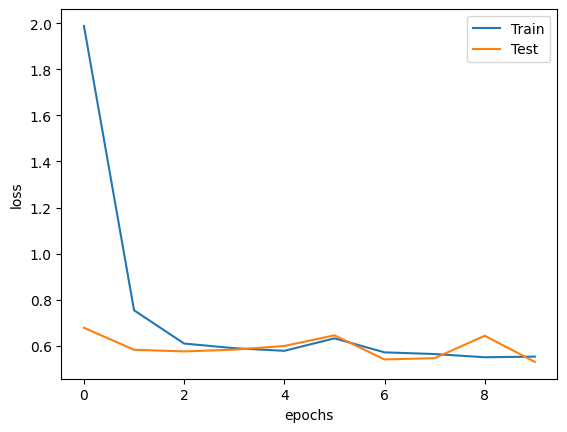

In [55]:
# adversarial training results
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])

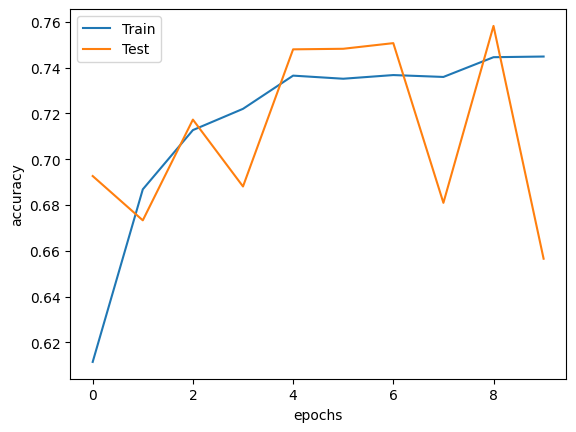

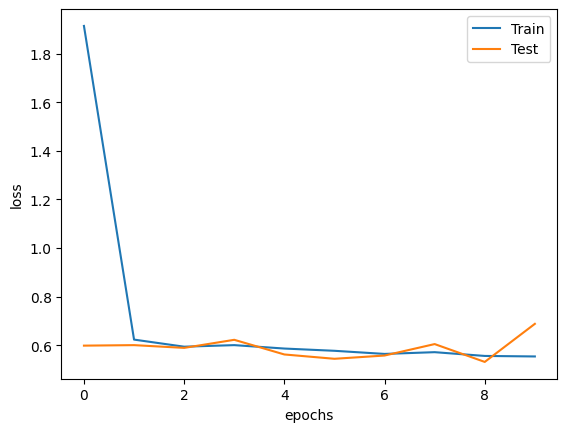

In [56]:
# adversarial attack results
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])

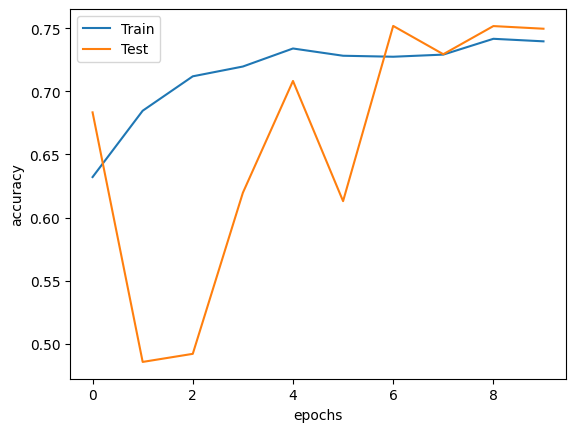

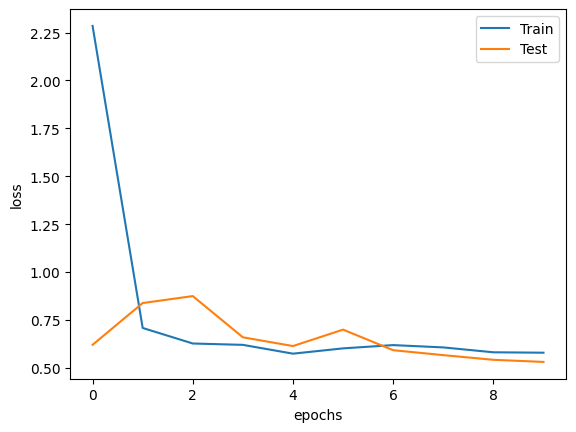

In [57]:
# adversarial training and attack results
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])

In [76]:
#Sequential model with stop words removed
model4 = tf.keras.Sequential()

#Dense layer - 128 units -input shape is for the 100 vector length, relu activation
model4.add(tf.keras.layers.Dense(24366,input_shape=[500],activation='relu'))
#'Turn off' half the neurons (reduce overfitting - model will not memorize data and will understand patterns)
model4.add(tf.keras.layers.Dropout(0.5))
#Dense layer - 64 units, relu activation
model4.add(tf.keras.layers.Dense(64,activation='relu'))
#Dense layer - 32 units, relu activation
model4.add(tf.keras.layers.Dense(32,activation='relu'))
#Dense layer - 16 units, relu activation
model4.add(tf.keras.layers.Dense(16,activation='relu'))
#Dense layer - 1 units, sigmoid activation
#Binary problem - probability of 1 class - derived with sigmoid
model4.add(tf.keras.layers.Dense(1,activation='sigmoid'))

#Train on Adam optimizer with 1e-4 learning rate, loss of binary crossentropy, accuracy tracked
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4),loss="binary_crossentropy", metrics=['accuracy'])

#Train on training set, test on testing set, for 5 epochs
history4 = model4.fit(x_train,y_train,validation_data=[x_test,y_test], epochs= 10)

Epoch 1/10
762/762 [==============================] - 187s 243ms/step - loss: 1.7228 - accuracy: 0.5898 - val_loss: 0.7481 - val_accuracy: 0.6135
Epoch 2/10
762/762 [==============================] - 185s 243ms/step - loss: 0.6834 - accuracy: 0.6416 - val_loss: 0.8577 - val_accuracy: 0.4884
Epoch 3/10
762/762 [==============================] - 187s 245ms/step - loss: 0.6681 - accuracy: 0.6538 - val_loss: 0.7711 - val_accuracy: 0.6457
Epoch 4/10
762/762 [==============================] - 187s 245ms/step - loss: 0.6834 - accuracy: 0.6602 - val_loss: 0.6067 - val_accuracy: 0.7012
Epoch 5/10
762/762 [==============================] - 188s 247ms/step - loss: 0.7541 - accuracy: 0.6513 - val_loss: 0.7887 - val_accuracy: 0.5500
Epoch 6/10
762/762 [==============================] - 187s 246ms/step - loss: 0.6524 - accuracy: 0.6730 - val_loss: 0.6231 - val_accuracy: 0.6769
Epoch 7/10
762/762 [==============================] - 187s 246ms/step - loss: 0.6518 - accuracy: 0.6779 - val_loss: 0.8858 -

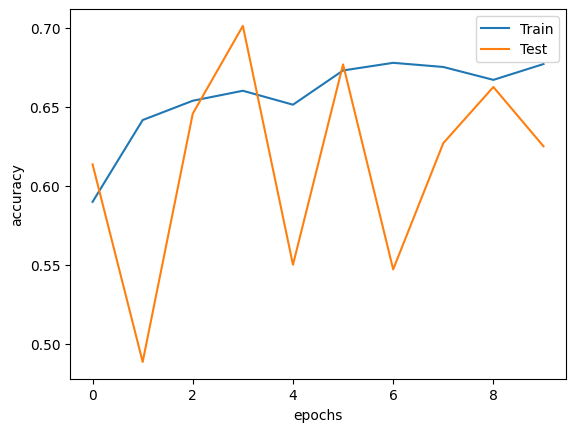

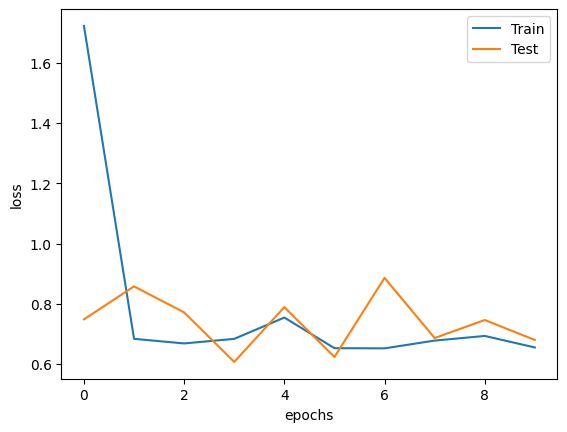

In [77]:
#baseline without stop words
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])

In [43]:
#%pip install wordcloud

In [44]:
#from wordcloud import WordCloud
#import matplotlib.pyplot as plt

In [45]:
#all_words = " ".join([sentence for sentence in df['statement']])


#wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
#plt.figure(figsize=(15, 9))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')
#plt.show()

In [46]:
#true_n = ' '.join(df[df['label']==1]['statement']) 
#wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(true_n)

# plot the graph
#plt.figure(figsize=(15, 9))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')
#plt.show()

In [47]:
#false_n = ' '.join(df[df['label']==0]['statement']) 
#wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(false_n)

# plot the graph
#plt.figure(figsize=(15, 9))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')
#plt.show()

In [48]:
#def plot_top_ngrams(corpus, title, ylabel, xlabel="Number of Occurences", n=2):
#  """Utility function to plot top n-grams"""
#  true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
#  true_b.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
#  plt.title(title)
#  plt.ylabel(ylabel)
#  plt.xlabel(xlabel)
#  plt.show()

In [49]:
#plot_top_ngrams(true_n, 'Top 20 Frequently Occuring True news Bigrams', "Bigram", n=2)

In [50]:
#plot_top_ngrams(false_n, 'Top 20 Frequently Occuring Fake news Bigrams', "Bigram", n=2)